# Resonator spectroscopy

A ressonator spectroscopy is the first procedure in order to calibrate out quantum computer.
This procedure is meant to find the resonant frequency of the different resonators.To do that, we make a sweep of frequencies in a reasonable rang to find the one that resonates in our particular resonator. These procedure is done while our qubit is in the ground state.

Firs of all let us import all the libraries needed.

In [1]:
"""Run circuit experiment"""
import numpy as np
import matplotlib.pyplot as plt

import os

from qibo.models.circuit import Circuit
from qibo.gates import M

from qiboconnection.api import API
from qiboconnection.connection import ConnectionConfiguration
from qiboconnection.connection import Connection

from qililab import build_platform
from qililab.experiment import Experiment
from qililab.typings import Parameter, ExperimentOptions, ExperimentSettings
from qililab.utils import Loop
from qililab.typings.loop import LoopOptions
from qililab.typings.execution import ExecutionOptions
from qililab.config import logger

logger.setLevel(30)

os.environ["RUNCARDS"] = "./runcards"
os.environ["DATA"] = "/home/qilimanjaro/Documents/data"

%matplotlib widget

### Qibo connection setup
In order to connect to the quantum computer, lets set our connection

In [2]:
configuration=ConnectionConfiguration(
        username = "pjamet",
        api_key = "04395e92-0c16-47ed-9130-8989f5db7f4e",
    )

connection = API()

In [3]:
# Verify connection
connection.ping()

'OK'

### Experiment parameters
In this part of the code we set the experiment parameters of the spectroscopy and create the loop.

In [10]:
# experiment parameters to change  on the spot:
attenuation = 37
current = -0.01

# loop parameters:
frequency_start = 8.1e9 
frequency_stop = 8.13e9
frequency_num = 101

current_start =0.00
current_stop = -0.03
current_num = 21

### Load the runcard

In [12]:
"""Load the platform via the runcard 'spectroscopy_demo'"""
platform = build_platform(name="spectroscopy_demo")
platform.connect_and_set_initial_setup(
    connection=connection,
    device_id=9)

print('\n Platform connected \n')


# Define Circuit to execute
circuit = Circuit(1)
circuit.add(M(0))
# In these case, the circuit is just the measurement gate 'M' aplied on qubit '0'


# Define experiment loop:
frequency_loop_options = LoopOptions(start=frequency_start, stop=frequency_stop, num=frequency_num)
frequency_loop = Loop(alias='rs_1', parameter=Parameter.LO_FREQUENCY, options=frequency_loop_options)

current_loop_options = LoopOptions(start=current_start, stop=current_stop, num=current_num, channel_id=1)
current_loop = Loop(alias='S4g', parameter=Parameter.CURRENT, options=current_loop_options, loop=frequency_loop)

experiment_options = ExperimentOptions(
    loops=[current_loop],
    name="spectroscopy_demo",
    connection=connection,
    remote_save=False,
    execution_options=ExecutionOptions(set_initial_setup=True, apply_bus_setup=False),
    settings=ExperimentSettings(repetition_duration=10000, hardware_average=1000))
 
demo = Experiment(
    platform=platform,
    circuits=[circuit],
    options=experiment_options)

# Gate Set parameter:
demo.set_parameter(alias='M', parameter=Parameter.DURATION, value=6000)

# Instrument set parameter:

demo.set_parameter(alias="S4g", parameter=Parameter.CURRENT, value=current, channel_id=1)
demo.set_parameter(alias="attenuator", parameter=Parameter.ATTENUATION, value=attenuation)


results = demo.execute()

[qibo-connection] 0.7.1|INFO|2023-03-01 13:06:11]: Device Galadriel Qblox rack blocked.
INFO:qiboconnection.config:Device Galadriel Qblox rack blocked.


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/101901, firmware:4.2.76.0-4.30.046.295) in 0.11s
Connected to: Qblox SPI Rack (serial:None, firmware:{'device': 'v1.6 - May 10 2019 - mt', 'driver': {'version': '0.8.1', 'build': '13/12/2022-09:29:06', 'hash': '6c0c23ba', 'dirty': False}}) in 0.00s
Current too low for set span, DAC set to min value
Current too low for set span, DAC set to min value
set ref from cluster to internal
gain path0 set to 0.09997864067554474
gain path1 set to 0.09997864067554474
Initial setup was called
 
 Gain Imbalance set to 1.0 

 
 Phase Imbalance set to -0.0 


 Platform connected 



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

[qibo-connection] 0.7.1|INFO|2023-03-01 13:07:53]: Device Galadriel Qblox rack released.
INFO:qiboconnection.config:Device Galadriel Qblox rack released.


Current too low for set span, DAC set to min value
Current too low for set span, DAC set to min value


### Results

Text(0, 0.5, '|S21|')

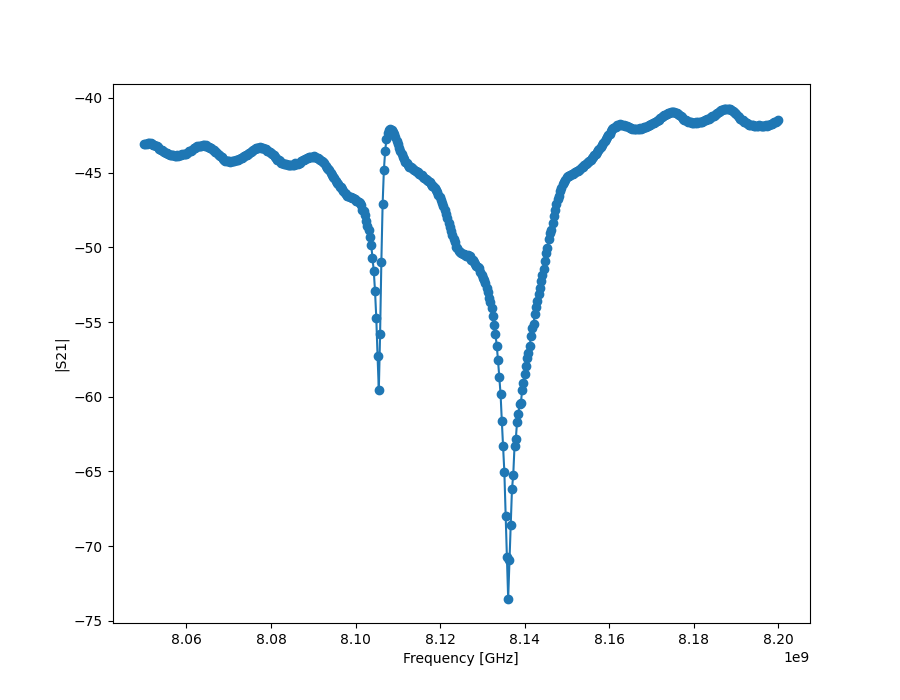

In [6]:
acquisitions = results.acquisitions()
i = np.array(acquisitions["i"])
q = np.array(acquisitions["q"])
frequency = np.linspace(start=frequency_loop.start, stop=frequency_loop.stop, num=frequency_loop.num)

plt.figure(figsize=(9, 7))
plt.plot(frequency,20*np.log10(np.sqrt(i**2+q**2)), '-o')
plt.xlabel('Frequency [GHz]')
plt.ylabel('|S21|')

In [ ]:
demo.draw()